<a href="https://colab.research.google.com/github/AmucheOgbonna/Fifa_datasets/blob/main/Copy_of_fifa_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Do your imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import csv

In [2]:
fifa_dataset={}
for i in range(15,20):
  fifa_dataset["20"+str(i)+"_dataset"]=pd.read_csv("https://raw.githubusercontent.com/AmucheOgbonna/Fifa_datasets/main/shared_files/players_/"+str(i)+".csv", lineterminator=None)
  #df = pd.read_csv(csvfile, header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
  #pd.read_csv(name,sep=";|,",engine ='python',chunksize=5000000,error_bad_lines=False)


In [3]:
print(fifa_dataset['2016_dataset'].head(10))

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/16...   
3     167495  https://sofifa.com/player/167495/manuel-neuer/...   
4     176580  https://sofifa.com/player/176580/luis-suarez/1...   
5     183277  https://sofifa.com/player/183277/eden-hazard/1...   
6      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
7     190871  https://sofifa.com/player/190871/neymar-da-sil...   
8     164240  https://sofifa.com/player/164240/thiago-emilia...   
9     168542  https://sofifa.com/player/168542/david-josue-j...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   28  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   30  1985-02-05   
2          A. Robben        

In [4]:
print(fifa_dataset['2016_dataset'].columns.values)


['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'po

In [5]:
columns_to_be_dropped = ['sofifa_id','player_url','potential','body_type','real_face','loaned_from','nation_position','nation_jersey_number','player_traits']

#fifa_dataset['2016_dataset'].reindex()

for i in range(15,20):
  fifa_dataset["20"+str(i)+"_dataset"] = fifa_dataset["20"+str(i)+"_dataset"].drop(columns=columns_to_be_dropped, axis=1, errors='ignore')

print(fifa_dataset['2016_dataset'].columns.values)
print(fifa_dataset['2016_dataset'].describe())

['short_name' 'long_name' 'age' 'dob' 'height_cm' 'weight_kg'
 'nationality' 'club' 'overall' 'value_eur' 'wage_eur' 'player_positions'
 'preferred_foot' 'international_reputation' 'weak_foot' 'skill_moves'
 'work_rate' 'release_clause_eur' 'player_tags' 'team_position'
 'team_jersey_number' 'joined' 'contract_valid_until' 'pace' 'shooting'
 'passing' 'dribbling' 'defending' 'physic' 'gk_diving' 'gk_handling'
 'gk_kicking' 'gk_reflexes' 'gk_speed' 'gk_positioning'
 'attacking_crossing' 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'power_long_shots' 'mentality_aggression' 'mentality_interceptions'
 'mentality_positioning' 'mentality_vision' 'mentality_penalties'
 'm

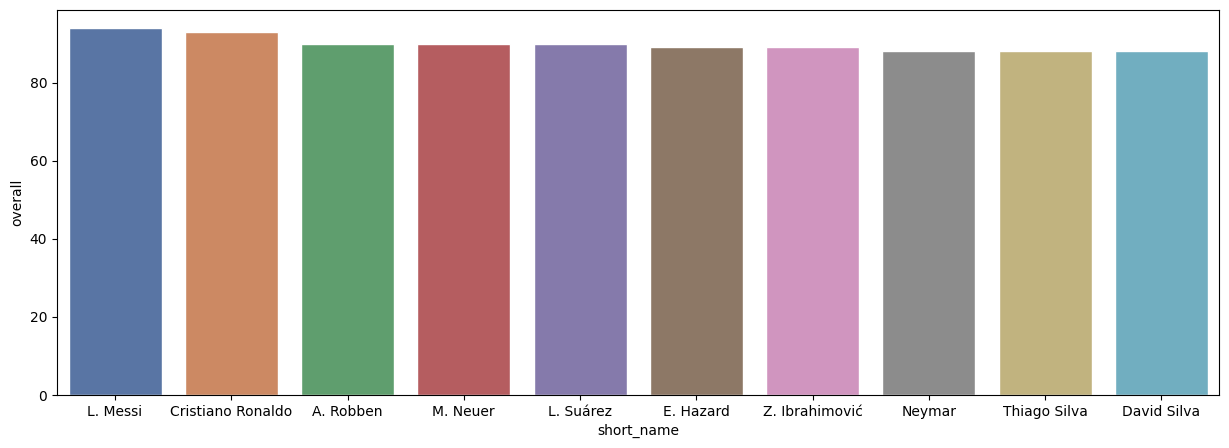

In [6]:
#Creating a BarChart
overall_sorted = fifa_dataset['2016_dataset'].sort_values(by=['overall'], ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,5))
sns.set_theme(style='whitegrid')
ax=sns.barplot(x='short_name',y='overall',data=overall_sorted)

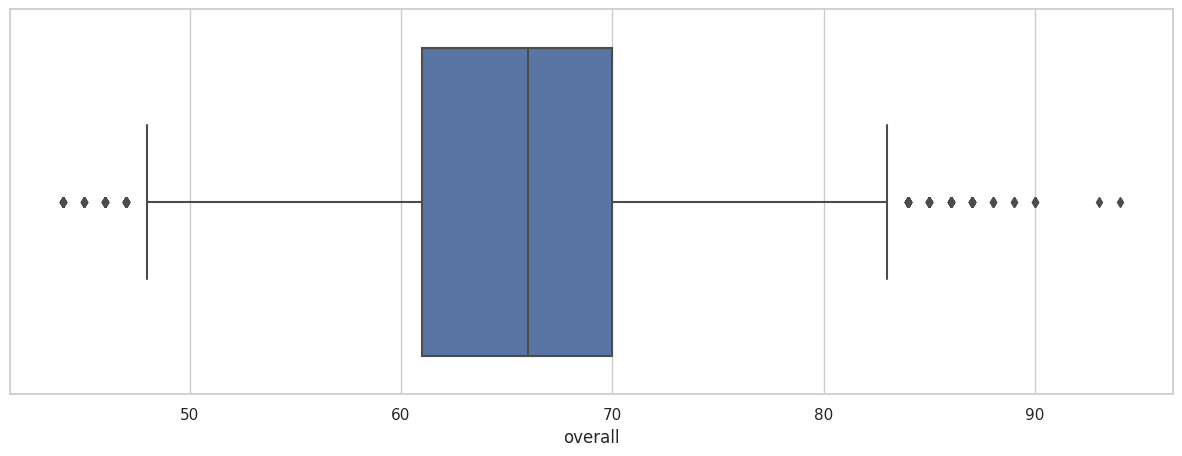

In [7]:
#Boxplot
fig, ax = plt.subplots(figsize=(15,5))
sns.set_theme(style='whitegrid')
ax=sns.boxplot(x=fifa_dataset['2016_dataset']['overall'])

<Axes: xlabel='age', ylabel='overall'>

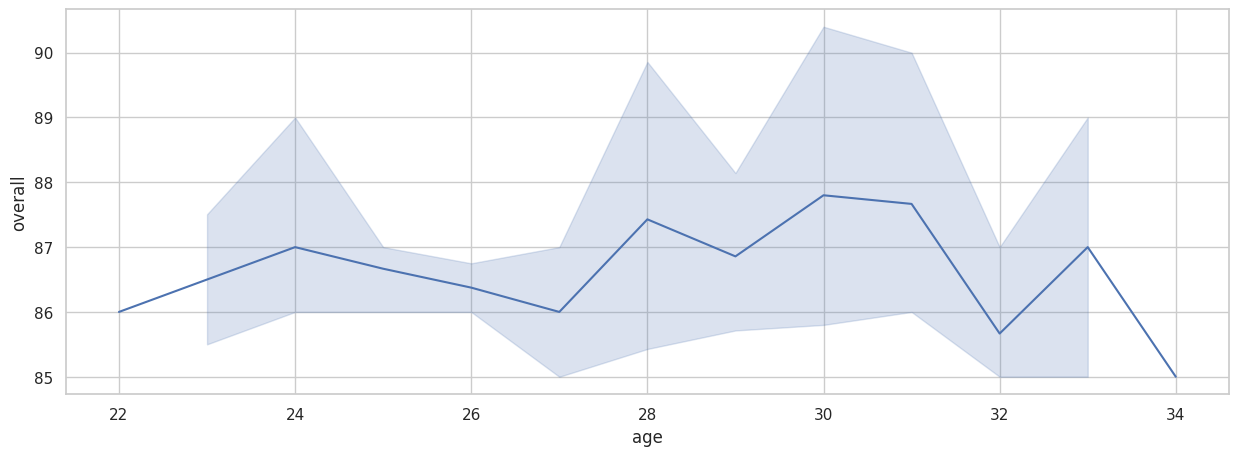

In [8]:
sorted_data=fifa_dataset['2016_dataset'].sort_values(by=['overall'], ascending=False).head(50)
fig, ax=plt.subplots(figsize=(15,5))
sns.set_theme(style='whitegrid')
sns.lineplot(data=sorted_data, x='age',y='overall')


In [9]:
#Add the BMI column
fifa_dataset['2016_dataset']['BMI']=fifa_dataset['2016_dataset']['weight_kg'] / (fifa_dataset['2016_dataset']['height_cm']/100)**2

#get one hot encoding
one_hot= pd.get_dummies(fifa_dataset['2016_dataset']['player_positions'])

#Drop now encoded column and add new column
fifa_dataset["2016_dataset"] = fifa_dataset["2016_dataset"].drop('player_positions', axis=1) #, errors='ignore'

#join encoding
fifa_dataset["2016_dataset"] = fifa_dataset["2016_dataset"].join(one_hot)

#label encoding
label_encoder=preprocessing.LabelEncoder()
fifa_dataset["2016_dataset"]['preferred_foot'] = label_encoder.fit_transform(fifa_dataset["2016_dataset"]['preferred_foot'])

label_encoder=preprocessing.LabelEncoder()
fifa_dataset["2016_dataset"]['nationality'] = label_encoder.fit_transform(fifa_dataset["2016_dataset"]['nationality'])

keys=label_encoder.classes_
values=label_encoder.transform(label_encoder.classes_)
preferred_foots_dict=dict(zip(keys,values))
print(preferred_foots_dict)
print(fifa_dataset.keys())

{'Albania': 0, 'Algeria': 1, 'Angola': 2, 'Antigua & Barbuda': 3, 'Argentina': 4, 'Armenia': 5, 'Aruba': 6, 'Australia': 7, 'Austria': 8, 'Azerbaijan': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Benin': 14, 'Bermuda': 15, 'Bolivia': 16, 'Bosnia Herzegovina': 17, 'Brazil': 18, 'Bulgaria': 19, 'Burkina Faso': 20, 'Cameroon': 21, 'Canada': 22, 'Cape Verde': 23, 'Central African Rep.': 24, 'Chile': 25, 'China PR': 26, 'Colombia': 27, 'Comoros': 28, 'Congo': 29, 'Costa Rica': 30, 'Croatia': 31, 'Cuba': 32, 'Curacao': 33, 'Cyprus': 34, 'Czech Republic': 35, 'DR Congo': 36, 'Denmark': 37, 'Dominican Republic': 38, 'Ecuador': 39, 'Egypt': 40, 'El Salvador': 41, 'England': 42, 'Equatorial Guinea': 43, 'Estonia': 44, 'Ethiopia': 45, 'FYR Macedonia': 46, 'Faroe Islands': 47, 'Finland': 48, 'France': 49, 'Gabon': 50, 'Gambia': 51, 'Georgia': 52, 'Germany': 53, 'Ghana': 54, 'Gibraltar': 55, 'Greece': 56, 'Grenada': 57, 'Guam': 58, 'Guatemala': 59, 'Guinea': 60, 'Guinea Bissau'

In [10]:
dataframe_to_be_merged=[]
# print(fifa_dataset.keys())

for j in range(15,20):
  fifa_dataset["20"+str(j)+"_dataset"]["Year"] ="20"+str(j)
  dataframe_to_be_merged.append(fifa_dataset["20"+str(j)+"_dataset"])

fifa_datasets=pd.concat(dataframe_to_be_merged)
fifa_datasets=fifa_datasets.groupby(['short_name']).mean()
fifa_datasets

<ipython-input-10-5680a07b8114>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fifa_datasets=fifa_datasets.groupby(['short_name']).mean()


,age,height_cm,weight_kg,overall,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,...,"ST, RM, RB","ST, RM, RW","ST, RW","ST, RW, CAM","ST, RW, CF","ST, RW, LW","ST, RW, LW, CAM","ST, RW, LW, CF","ST, RW, RM","ST, RW, RM, CF"
short_name,,,,,,,,,,,,,,,,,,,,,
A. Abang,19.333333,185.0,73.000000,61.333333,370000.000000,1000.000000,1.0,2.000000,2.666667,723000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. Abass,23.000000,183.0,74.333333,54.333333,56666.666667,666.666667,1.0,2.333333,1.333333,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. Abbas,29.400000,173.6,71.000000,62.400000,223000.000000,3000.000000,1.0,2.800000,2.600000,281000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. Abdallah,19.000000,180.0,75.000000,52.000000,70000.000000,1000.000000,1.0,3.000000,2.000000,154000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A. Abdellaoui,25.000000,185.0,75.000000,59.000000,170000.000000,4000.000000,1.0,2.000000,2.000000,259000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Óscar Ramírez,30.500000,183.0,82.000000,67.000000,275000.000000,4000.000000,1.0,3.000000,2.000000,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Óscar Rico,28.000000,177.0,76.000000,62.000000,0.000000,0.000000,1.0,3.000000,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Óscar Sendinho,28.000000,178.0,74.000000,68.000000,675000.000000,3000.000000,1.0,3.000000,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import numpy as np

[91.4, 92.8, 81.0, 90.4, 33.2, 93.4]


Text(0.5, 1.0, "Cristiano Ronaldo's attribute Radar plot")

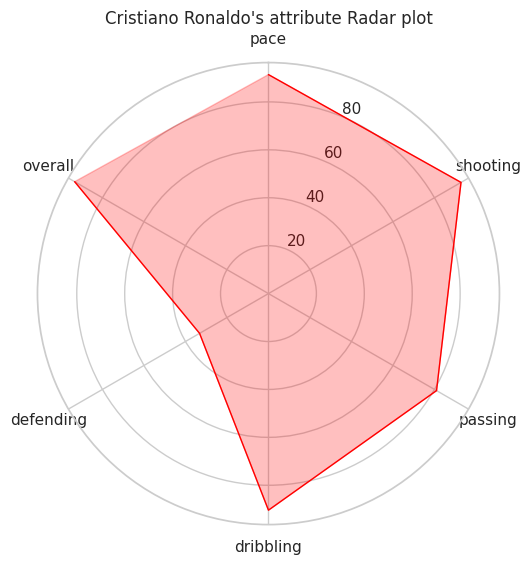

In [34]:
# Col we need to compare with
labels=["pace","shooting","passing","dribbling","defending","overall"]
fifa_datasets=fifa_datasets[labels]

# Get Number of labels
num_vars=len(labels)

# Getting Cristiano's attribute
name="Cristiano Ronaldo"
values=fifa_datasets.loc[name].tolist()
print(values)

# Split the cirlce into even parts and save the angles
# So we know where to put each axis
angles=np.linspace(0,2*np.pi,num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end
values+=values[:0]
angles+=angles[:0]
fig, ax=plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Dram axis lines for each angle and label
ax.set_thetagrids(np.degrees(angles),labels)

# Draw the outline of our data
ax.plot(angles, values, color='red', linewidth=1)

# Fill it in
ax.fill(angles, values, color='red', alpha=0.25)
ax.set_title("Cristiano Ronaldo's attribute Radar plot")

[90.2, 89.6, 86.4, 95.8, 27.0, 93.4]


Text(0.5, 1.0, "ionel. Messi's attribute Radar plot")

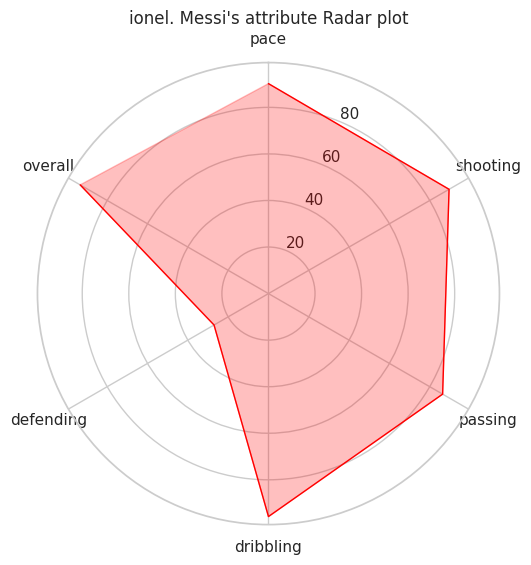

In [35]:
# Col we need to compare with
labels=["pace","shooting","passing","dribbling","defending","overall"]
fifa_datasets=fifa_datasets[labels]

# Get Number of labels
num_vars=len(labels)

# Getting Cristiano's attribute
name="L. Messi"
values=fifa_datasets.loc[name].tolist()
print(values)

# Split the cirlce into even parts and save the angles
# So we know where to put each axis
angles=np.linspace(0,2*np.pi,num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end
values+=values[:0]
angles+=angles[:0]
fig, ax=plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Dram axis lines for each angle and label
ax.set_thetagrids(np.degrees(angles),labels)

# Draw the outline of our data
ax.plot(angles, values, color='red', linewidth=1)

# Fill it in
ax.fill(angles, values, color='red', alpha=0.25)
ax.set_title("ionel. Messi's attribute Radar plot")